# The research question is To predict the Acceleration based on Displacement,Horsepower, Miles_per_Gallon,Weight_in_kg

## Importing all the libaries we are going to use

In [224]:
import pandas as pd
import numpy as np
import json
import urllib
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Webscrapping the data

In [225]:
url = "https://raw.githubusercontent.com/vega/vega/master/docs/data/cars.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())
df = pd.DataFrame(data)
df

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01
5,10.0,8,429.0,198.0,15.0,ford galaxie 500,USA,4341,1970-01-01
6,9.0,8,454.0,220.0,14.0,chevrolet impala,USA,4354,1970-01-01
7,8.5,8,440.0,215.0,14.0,plymouth fury iii,USA,4312,1970-01-01
8,10.0,8,455.0,225.0,14.0,pontiac catalina,USA,4425,1970-01-01
9,8.5,8,390.0,190.0,15.0,amc ambassador dpl,USA,3850,1970-01-01


# Information about the Data
#### Aceleration: Amount of time it takes to reach 96.56 km/h from 0 km/h, in seconds.
#### Cylinders: Number of cylinders in the car's engine.
#### Displacement: The engine volume, in cubic centimeter.
#### Horsepower: The amount of power the engine produce, in horsepower.
#### Miles_per_Gallon: the fuel economy of the vehicle, in miles per gallon(i will change it to kilometers per gallon).
#### Name: vehicle company and model.
#### Origin: origin of the company.
#### Year: Year of production.

#### *There is no turbo in the engines of these vehicles.

## Deviding the data to train and test sets

In [226]:
train_set, test_set = train_test_split(df,test_size=0.2, random_state=23)

## cleaning the train_set

#### erasing duplicates rows(duplicate cars)

In [227]:
train_set.drop_duplicates()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
266,16.7,6,200.0,85.0,20.8,mercury zephyr,USA,3070,1978-01-01
74,11.0,8,429.0,208.0,11.0,mercury marquis,USA,4633,1972-01-01
375,19.6,4,112.0,88.0,28.0,chevrolet cavalier,USA,2605,1982-01-01
294,13.2,8,351.0,138.0,16.5,mercury grand marquis,USA,3955,1979-01-01
385,17.6,4,91.0,68.0,31.0,mazda glc custom,Japan,1970,1982-01-01
378,16.2,4,112.0,85.0,31.0,pontiac j2000 se hatchback,USA,2575,1982-01-01
175,17.0,4,140.0,83.0,23.0,ford pinto,USA,2639,1975-01-01
359,20.7,4,98.0,65.0,29.9,ford escort 2h,USA,2380,1982-01-01
337,17.3,4,85.0,NaN,40.9,renault lecar deluxe,Europe,1835,1980-01-01
135,17.0,6,250.0,100.0,15.0,chevrolet nova,USA,3336,1974-01-01


#### checking for null values in the data and erasing those rows

In [228]:
train_set.isnull().sum()

Acceleration        0
Cylinders           0
Displacement        0
Horsepower          5
Miles_per_Gallon    6
Name                0
Origin              0
Weight_in_lbs       0
Year                0
dtype: int64

In [229]:
train_set = train_set.dropna(how='any',axis=0)
train_set.isnull().sum()

Acceleration        0
Cylinders           0
Displacement        0
Horsepower          0
Miles_per_Gallon    0
Name                0
Origin              0
Weight_in_lbs       0
Year                0
dtype: int64

#### converting the data from US measurements to IL measurements

In [230]:
train_set = train_set.sort_values(by="Acceleration", ascending=True)
train_set.rename({'Weight_in_lbs': 'Weight_in_Kg', 'Miles_per_Gallon': 'Kilometers_per_Gallon'}, axis=1, inplace=True)

train_set['Weight_in_Kg'] = train_set['Weight_in_Kg'].apply(lambda x: int(x*0.45359237))
train_set['Kilometers_per_Gallon'] = train_set['Kilometers_per_Gallon'].apply(lambda x: int(x*1.609344))
train_set.drop(['Name', 'Origin', 'Year'], axis=1, inplace=True)
train_set.head()

,Acceleration,Cylinders,Displacement,Horsepower,Kilometers_per_Gallon,Weight_in_Kg
16,8.0,8,340.0,160.0,22,1637
7,8.5,8,440.0,215.0,22,1955
9,8.5,8,390.0,190.0,24,1746
6,9.0,8,454.0,220.0,22,1974
5,10.0,8,429.0,198.0,24,1969


## cleaning the test_set

#### erasing duplicates rows(duplicate cars)

In [231]:
test_set.drop_duplicates()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
286,16.6,4,98.0,68.0,29.5,honda Accelerationord lx,Japan,2135,1978-01-01
217,15.5,6,156.0,108.0,19.0,toyota mark ii,Japan,2930,1976-01-01
401,15.6,4,140.0,86.0,27.0,ford mustang gl,USA,2790,1982-01-01
281,15.9,5,131.0,103.0,20.3,audi 5000,Europe,2830,1978-01-01
108,16.0,6,198.0,95.0,23.0,plymouth duster,USA,2904,1973-01-01
139,17.0,4,140.0,75.0,25.0,chevrolet vega,USA,2542,1974-01-01
275,14.7,4,119.0,97.0,27.2,datsun 510,Japan,2300,1978-01-01
195,13.0,8,318.0,150.0,16.0,dodge coronet brougham,USA,4190,1976-01-01
273,16.5,4,98.0,68.0,30.0,chevrolet chevette,USA,2155,1978-01-01
174,16.0,4,97.0,75.0,29.0,toyota corolla,Japan,2171,1975-01-01


#### checking for null values in the data and erasing those rows

In [232]:
test_set.isnull().sum()

Acceleration        0
Cylinders           0
Displacement        0
Horsepower          1
Miles_per_Gallon    2
Name                0
Origin              0
Weight_in_lbs       0
Year                0
dtype: int64

In [233]:
test_set = test_set.dropna(how='any',axis=0)
test_set.isnull().sum()

Acceleration        0
Cylinders           0
Displacement        0
Horsepower          0
Miles_per_Gallon    0
Name                0
Origin              0
Weight_in_lbs       0
Year                0
dtype: int64

#### converting the data from US measurements to IL measurements

In [234]:
test_set = test_set.sort_values(by="Acceleration", ascending=True)
test_set.rename({'Weight_in_lbs': 'Weight_in_Kg', 'Miles_per_Gallon': 'Kilometers_per_Gallon'}, axis=1, inplace=True)

test_set['Weight_in_Kg'] = test_set['Weight_in_Kg'].apply(lambda x: int(x*0.45359237))
test_set['Kilometers_per_Gallon'] = test_set['Kilometers_per_Gallon'].apply(lambda x: int(x*1.609344))
test_set.drop(['Name', 'Origin', 'Year'], axis=1, inplace=True)

## Inspecting the data

In [235]:
train_set.describe()

,Acceleration,Cylinders,Displacement,Horsepower,Kilometers_per_Gallon,Weight_in_Kg
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,15.545367,5.431310,192.017572,103.942492,37.412141,1340.581470
std,2.736222,1.687789,103.023276,37.724667,12.639964,380.131321
min,8.000000,3.000000,68.000000,46.000000,16.000000,731.000000
25%,13.800000,4.000000,101.000000,78.000000,28.000000,1006.000000
50%,15.500000,4.000000,151.000000,95.000000,36.000000,1265.000000
75%,17.300000,6.000000,260.000000,120.000000,46.000000,1603.000000
max,24.800000,8.000000,455.000000,225.000000,74.000000,2331.000000


 ## Looking for connection between the variables to the Acceleration

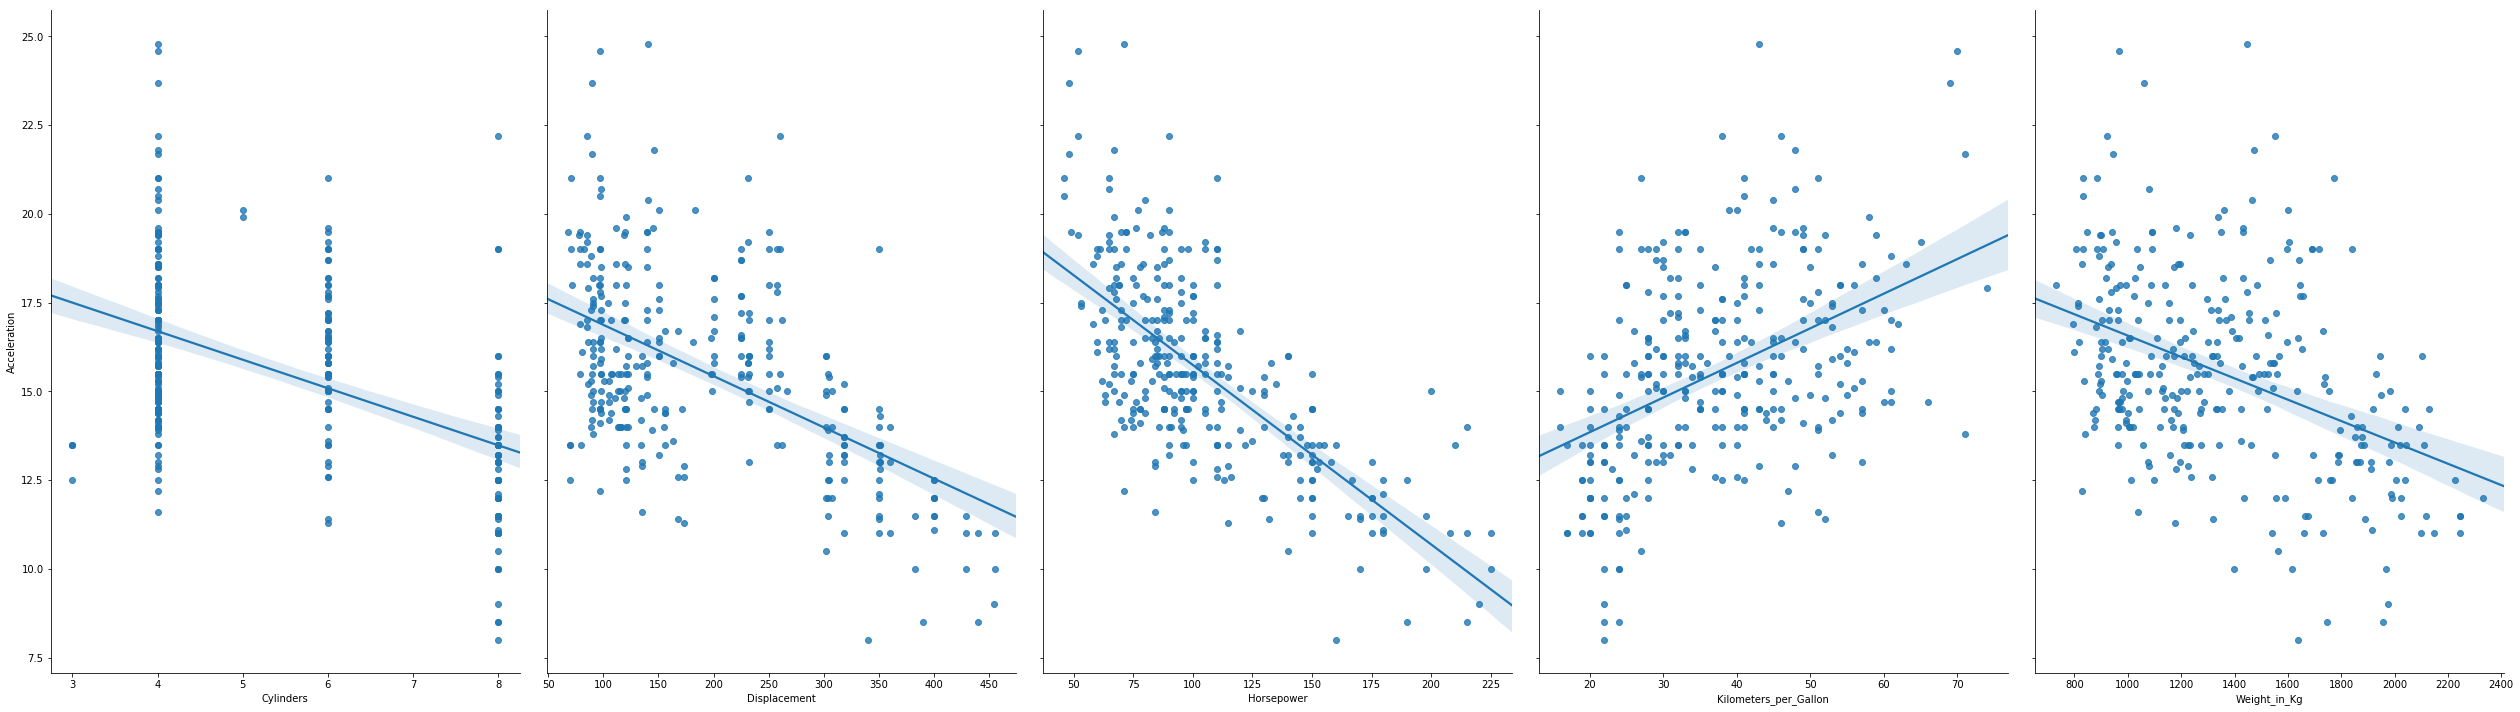

In [236]:
sns.pairplot(train_set, x_vars=['Cylinders', 'Displacement', 'Horsepower', 'Kilometers_per_Gallon', 'Weight_in_Kg'], y_vars='Acceleration', 
             size=10, aspect = 0.7, kind='reg')

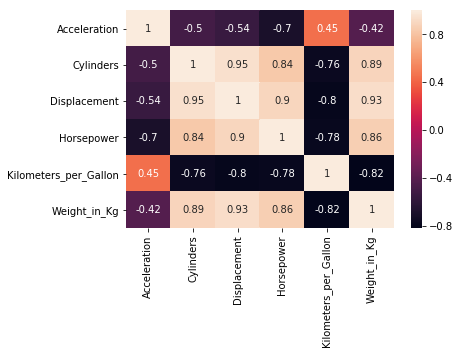

In [237]:
sns.heatmap(train_set.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2649DD0F0>,
      dtype=object)

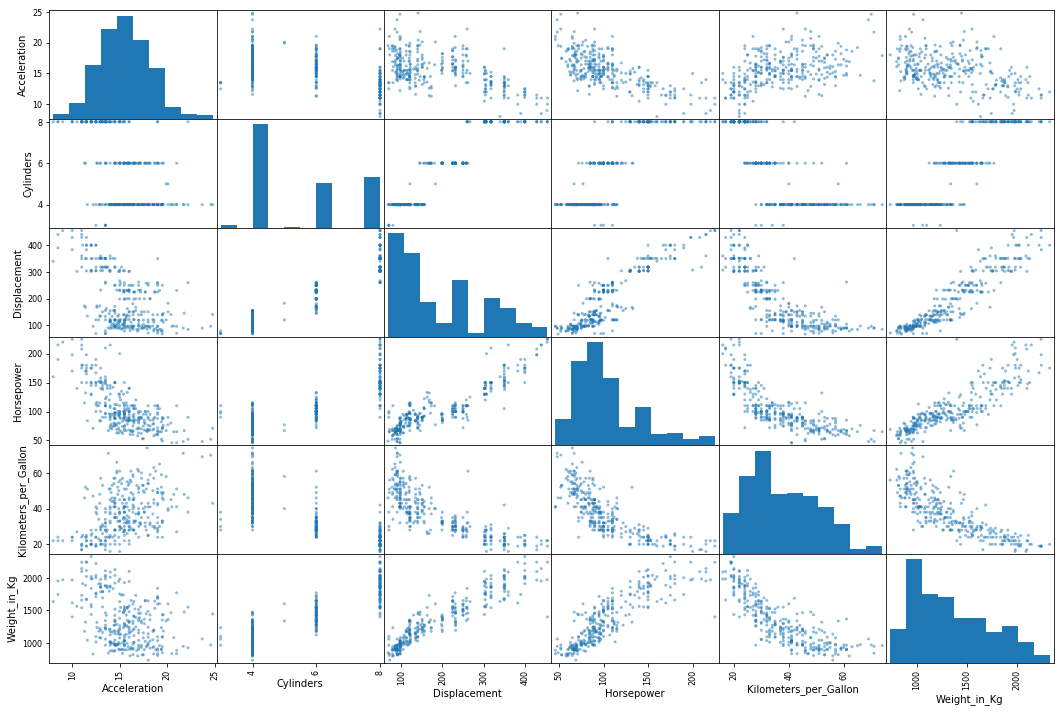

In [238]:
scatter_matrix(train_set, figsize=(18, 12))

#### From the scatter matrix we can infer that there is not strong connection between the Cylinders and the other features of the vehicles

In [239]:
train_set.drop(['Cylinders'], axis=1, inplace=True)
test_set.drop(['Cylinders'], axis=1, inplace=True)

### Standard deviation of HorsePower, Displacement, Kilometer_per_Gallon, Wieght_in_Kg

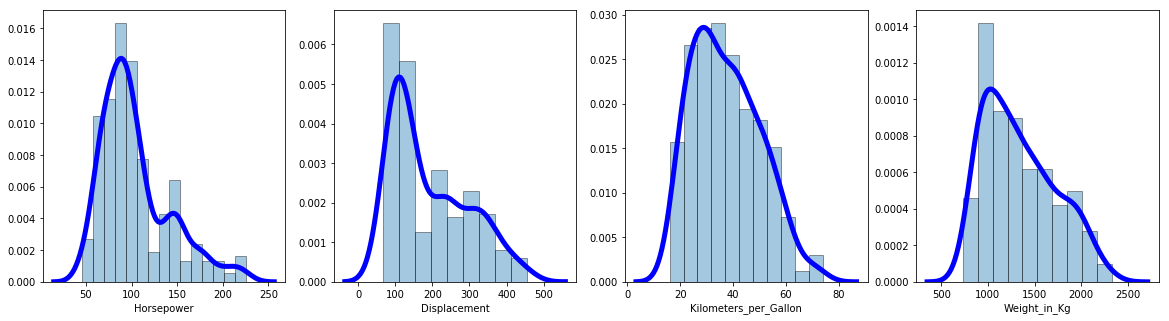

In [240]:
fig, axes = plt.subplots(1,4, figsize = (20,5))
sns.distplot(train_set['Horsepower'], hist=True, kde=True,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[0])

sns.distplot(train_set['Displacement'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[1])

sns.distplot(train_set['Kilometers_per_Gallon'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[2])
sns.distplot(train_set['Weight_in_Kg'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[3])

#### From the Standard deviation we can infer that most data is close to the mean, but the Horsepower and Displacement that spread a bit more

# building 3 different models for Regression

### Splitting the train set to x,y of the set.

In [241]:
x_train = train_set[['Displacement', 'Horsepower', 'Kilometers_per_Gallon', 'Weight_in_Kg']]
y_train = train_set['Acceleration']

In [242]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)

### Linear Regression model

In [243]:
linear_reg = linear_model.LinearRegression()

In [244]:
l_scores = cross_val_score(linear_reg, x_train, y_train, scoring='r2', cv=folds)
print(l_scores)
np.mean(l_scores)

[0.46075531 0.56107003 0.7250755  0.65762021]


0.6011302612047178

### KNeighborsRegressor model

In [245]:
knn_reg = KNeighborsRegressor()
knn_scores = cross_val_score(knn_reg, x_train, y_train, scoring='r2', cv=folds)
print(knn_scores)
np.mean(knn_scores)

[0.35345652 0.3414517  0.50366911 0.45588367]


0.41361525022762935

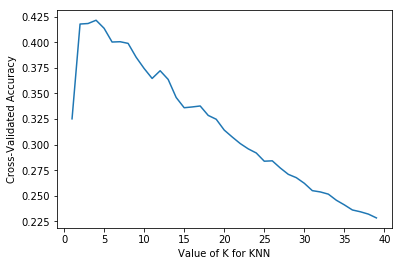

In [246]:
k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_reg, x_train, y_train, cv=folds, scoring='r2')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Decision Tree model

In [247]:
params_dict = {"max_depth":range(2,15), "min_samples_leaf":range(2,15), "min_samples_split": range(2,15)}
dt_reg = DecisionTreeRegressor(random_state=42)

grid = GridSearchCV(dt_reg, params_dict, cv=folds)
grid.fit(x_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.6295319344819165


In [248]:
dt_scores = cross_val_score(dt_reg, x_train, y_train, scoring='r2', cv=folds)
print(dt_scores)
np.mean(dt_scores)

[0.52606118 0.19452821 0.67889173 0.52834852]


0.48195741197570635

#### We see that the highest score is from the gridsearch and not the cross validation

# Selecting the model with the highest(DecisionTreeRegressor model) accuracy and trying to improve it's accuracy

### Log Transformation for Horsepower, Displacement, Kilometers_per_Gallon, Weight_in_Kg

In [249]:
x_train['Log_HP'] = np.log(x_train['Horsepower'])
x_train['Log_Displacement'] = np.log(x_train['Displacement'])
x_train['Log_KPG'] = np.log(x_train['Kilometers_per_Gallon'])
x_train['Log_Weight'] = np.log(x_train['Weight_in_Kg'])

new_train = x_train
new_train['Acceleration'] = y_train

test_set['Log_HP'] = np.log(test_set['Horsepower'])
test_set['Log_Displacement'] =  np.log(test_set['Displacement'])
test_set['Log_KPG'] = np.log(test_set['Kilometers_per_Gallon'])
test_set['Log_Weight'] = np.log(test_set['Weight_in_Kg'])

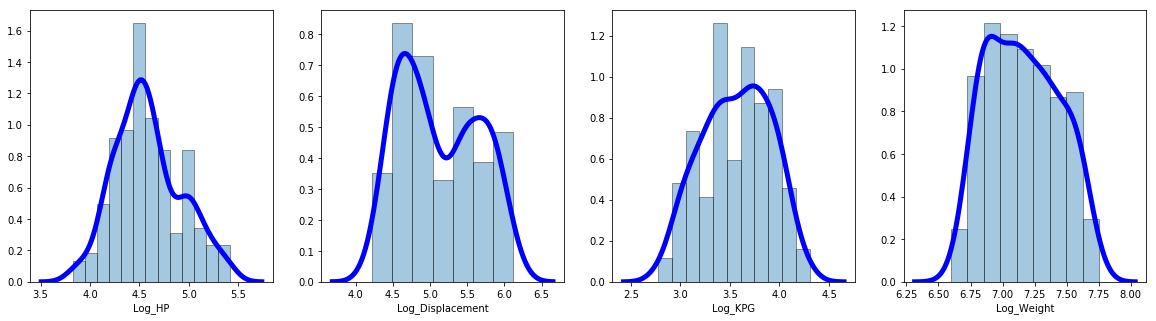

In [250]:
fig, axes = plt.subplots(1,4, figsize = (20,5))
sns.distplot(new_train['Log_HP'], hist=True, kde=True,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[0])

sns.distplot(new_train['Log_Displacement'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[1])

sns.distplot(new_train['Log_KPG'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[2])
sns.distplot(new_train['Log_Weight'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[3])

#### we can infer from those plots that the Log Transformation helped us normalize the data to make the model more accurate.

#### ploting the log graphs of Horsepower, Displacement, Kilometers_per_Gallon, Weight_in_Kg

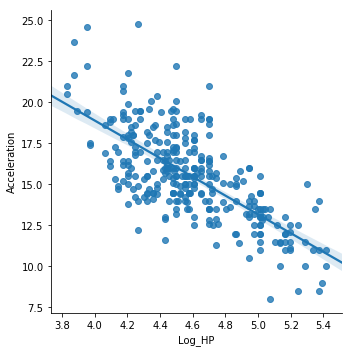

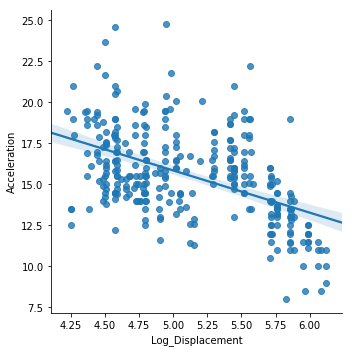

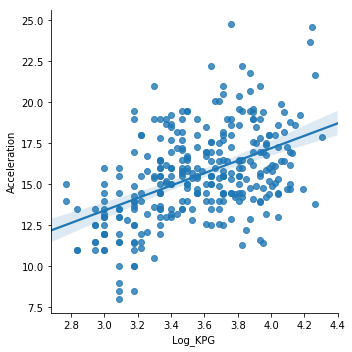

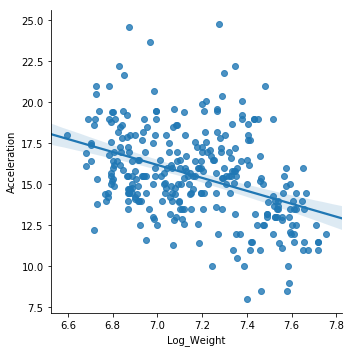

In [251]:
for t in ['Log_HP', 'Log_Displacement', 'Log_KPG', 'Log_Weight']:
    sns.lmplot(x=t, y='Acceleration', data = new_train, order=1)
    plt.show()

### splitting the train set to x_train y_train

In [252]:
X_train = new_train[['Displacement', 'Horsepower', 'Kilometers_per_Gallon', 'Weight_in_Kg', 'Log_HP', 'Log_Displacement', 'Log_KPG', 'Log_Weight']]
Y_train = new_train['Acceleration']

#### Let's check the score of the decision tree model

In [253]:
dt = DecisionTreeRegressor(random_state=42)
new_grid = GridSearchCV(dt, params_dict, cv=folds)
new_grid.fit(X_train,Y_train)

print(new_grid.best_params_)
print(new_grid.best_score_)

{'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.6323492318749374


#### We tried to improve the DecisionTreeRegressor model and it didn't impact the score much, so let's try to improve the next highest scored model(LinearRegression model)

### calculating the score of the model

In [254]:
scores = cross_val_score(linear_reg, X=X_train, y=Y_train, scoring='r2', cv=folds)
print(scores)
np.mean(scores)

[0.65665636 0.64016122 0.76044492 0.75769401]


0.7037391245794788

#### We can see that the model accuracy did improved and it's higher than the DecisionTreeRegressor model so we will choose the Linear Regression model to be our final model.

# Testing our model

### splitting the test set to x_test y_test

In [255]:
X_test = test_set[['Displacement', 'Horsepower', 'Kilometers_per_Gallon', 'Weight_in_Kg', 'Log_HP', 'Log_Displacement', 'Log_KPG', 'Log_Weight']]
Y_test = test_set['Acceleration'].copy()

### calculating the final score of our Linear Regression model

In [256]:
model = linear_reg
model.fit(X_train, Y_train)
final_pred = model.predict(X_test)
final_score = r2_score(Y_test,final_pred)
final_score

0.6773730235313409